In [26]:
import numpy as np
from matplotlib import pyplot as plt

user input

In [27]:
T = 2 # Total time in years

offspring = 5 # Number of female offspring per parent

initialization

In [28]:
Δt = 0.05  # Time step in years, greatest common divisor of fertility age and reproduction time

time = np.arange(0, T + 0.01, Δt)

number_of_rats = np.zeros(len(time), dtype=int)

rats = set()

rat class

In [29]:
class Rat:
    def __init__(self):
        self.age = 0
        self.fertile = False

    def grow(self):
        if self.age == 0.25:
            self.fertile = True       

        if self.age >= 0.25 and self.fertile:
            for _ in range(offspring):
                rats.add(Rat())

        if self.age >= 0.25:
            self.fertile = not self.fertile # produce offspring every other time step
        
        self.age += Δt

simulation

In [30]:
mother = Rat()     # initial rat
mother.age = 0.25  # Set the initial age of the mother rat to trigger birth
rats.add(mother)

for i in range(len(time)):
    for rat in list(rats):
        rat.grow()
    number_of_rats[i] = (len(rats) - 1) * 2 # males + females, consider initial mother rat

results

29,991,260 rats offspring after 2 years


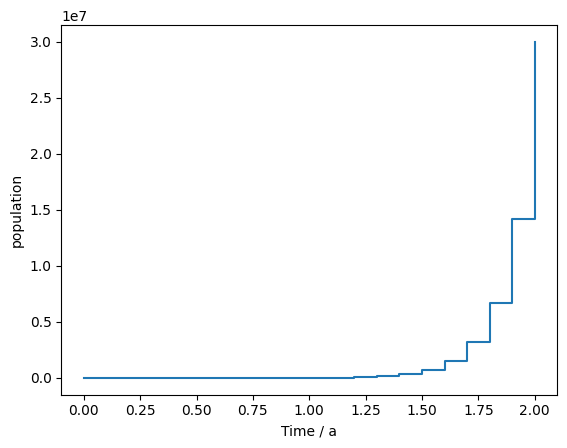

In [31]:
plt.plot(time, number_of_rats, drawstyle='steps-post')
plt.xlabel('Time / a')
plt.ylabel('population')

print(f"{number_of_rats[-1]:,} rats offspring after {T} years")